# Factor Analysis and Principal Component Analysis

### Name : Imamhussain Naikwade

In [1]:
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

### importing or loading the dataset

In [2]:
bank1 = pd.read_csv("./bank-additional-full.csv", sep = ";")
bank2 = pd.read_csv("./bank-full.csv", sep = ";")
bank = pd.concat([bank1, bank2[['balance']]], axis = 1)

In [3]:
bank.shape

(45211, 22)

In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  float64
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  float64
 11  campaign        41188 non-null  float64
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  float64
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Data Cleaning

In [5]:
bank['job'].replace({'unknown':np.nan}, inplace = True)
bank['marital'].replace({'unknown':np.nan}, inplace = True)
bank['education'].replace({'unknown':np.nan}, inplace = True)
bank['default'].replace({'unknown':np.nan, 'no':0, 'yes': 1}, inplace = True)
bank['housing'].replace({'unknown':np.nan, 'no':0, 'yes': 1}, inplace = True)
bank['loan'].replace({'unknown':np.nan,'no':0, 'yes': 1}, inplace = True)
bank['poutcome'].replace({'nonexistent':'0.5','failure':0, 'success': 1}, inplace = True)

In [6]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,balance
0,56.0,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,may,mon,...,999.0,0.0,0.5,1.1,93.994,-36.4,4.857,5191.0,no,2143
1,57.0,services,married,high.school,NaN,0.0,0.0,telephone,may,mon,...,999.0,0.0,0.5,1.1,93.994,-36.4,4.857,5191.0,no,29
2,37.0,services,married,high.school,0.0,1.0,0.0,telephone,may,mon,...,999.0,0.0,0.5,1.1,93.994,-36.4,4.857,5191.0,no,2
3,40.0,admin.,married,basic.6y,0.0,0.0,0.0,telephone,may,mon,...,999.0,0.0,0.5,1.1,93.994,-36.4,4.857,5191.0,no,1506
4,56.0,services,married,high.school,0.0,0.0,1.0,telephone,may,mon,...,999.0,0.0,0.5,1.1,93.994,-36.4,4.857,5191.0,no,1


In [7]:
bank.isna().sum()

age                4023
job                4353
marital            4103
education          5754
default           12620
housing            5013
loan               5013
contact            4023
month              4023
day_of_week        4023
duration           4023
campaign           4023
pdays              4023
previous           4023
poutcome           4023
emp.var.rate       4023
cons.price.idx     4023
cons.conf.idx      4023
euribor3m          4023
nr.employed        4023
y                  4023
balance               0
dtype: int64

In [8]:
bank = bank.dropna(how ='any')

In [9]:
bank.index = range(0,bank.shape[0])
bank = bank.astype({"default":'int', "housing":'int', "loan":'int', "poutcome":'float'})

In [10]:
from sklearn.preprocessing import LabelEncoder
bank['job'] = LabelEncoder().fit_transform(bank['job'])
bank['marital'] = LabelEncoder().fit_transform(bank['marital'])
bank['education'] = LabelEncoder().fit_transform(bank['education'])
bank['contact'] = LabelEncoder().fit_transform(bank['contact'])
bank['month'] = LabelEncoder().fit_transform(bank['month'])
bank['day_of_week'] = LabelEncoder().fit_transform(bank['day_of_week'])

In [11]:
bank.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
balance           0
dtype: int64

In [12]:
bank.shape

(30488, 22)

### Feature's Dataset

In [13]:
df = bank[['age', 'job', 'marital','education', 'default','balance', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome']]

In [14]:
df.shape

(30488, 16)

## Adequacy Test

### Bartlett’s test

In [15]:
#p-value should be 0 (statistically sig.)
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
print(chi_square_value, p_value)

69396.14653213619 0.0


### Kaiser-Meyer-Olkin Test

In [16]:
#Value should be 0.6<
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
print(kmo_model)

0.30602072548083903


### Since overall KMO for our data is 0.30, (ideally it should be greater than 0.6). This value indicates that we cannot proceed with planned factor analysis. So we will go for Principal Component Analysis. even so I am doing both factor analysis as well as PCA to compare the result 

### Choosing the Number of Factors

In [17]:
fa = FactorAnalyzer()
fa.fit(df)
ev, v = fa.get_eigenvalues()
ev

array([1.72821386, 1.49933475, 1.38442801, 1.26577746, 1.08284765,
       1.05545096, 1.03382819, 0.99501043, 0.9892758 , 0.96522963,
       0.94555717, 0.90967022, 0.8510012 , 0.63335852, 0.58704559,
       0.07397056])

## Scree Plot

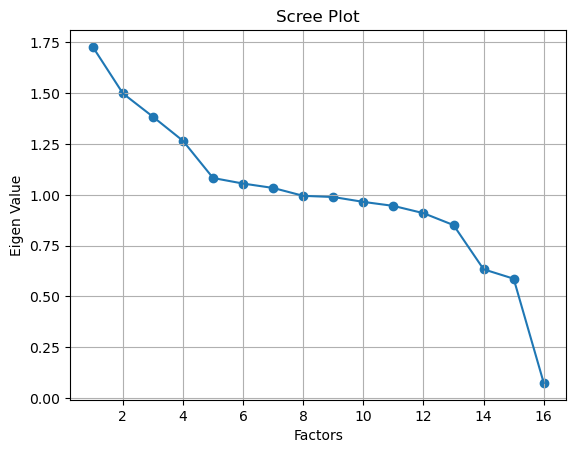

In [18]:
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()

### We can see only for 7-factors eigenvalues are greater than one also from the graph, we can see that the eigenvalues drop below 1 from the 8th factor. So, the optimal number of factors is 7.

## Performing Factor Analysis

### Unrotated Factor Matrix

In [19]:
fa = FactorAnalyzer(n_factors=7)
fa.fit(df)
print(pd.DataFrame(fa.loadings_,index=df.columns))

                    0         1         2         3         4         5  \
age         -0.022324  0.058659  0.916775 -0.007116  0.029444  0.054796   
job          0.010597  0.032884  0.006191  0.011206  0.247934  0.042476   
marital     -0.029910 -0.010691 -0.448220 -0.005869  0.086190 -0.037216   
education    0.032562  0.063494 -0.119107  0.006392  0.474409  0.107614   
default      0.002058 -0.005783  0.005547 -0.002029  0.025019 -0.007071   
balance     -0.006868 -0.005101  0.008712  0.069718  0.032258 -0.017645   
housing      0.026535  0.006090  0.027067  0.009378  0.004790 -0.011309   
loan         0.013602  0.003889 -0.003356  0.004225 -0.030617  0.021892   
contact      0.132351  0.090314 -0.008587  0.206667 -0.133984  0.153124   
month       -0.078007 -0.046980 -0.041201  0.979638 -0.118093 -0.030252   
day_of_week  0.023141  0.013845 -0.015763  0.013886 -0.019181 -0.135015   
duration    -0.002819  0.032206  0.001063 -0.019904 -0.038765 -0.201450   
campaign     0.013369  0.

In [20]:
print(pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))

                         0         1         2         3         4         5  \
Variance          1.668614  1.474326  1.063286  1.024886  0.376183  0.251120   
Proportional Var  0.104288  0.092145  0.066455  0.064055  0.023511  0.015695   
Cumulative Var    0.104288  0.196434  0.262889  0.326945  0.350456  0.366151   

                         6  
Variance          0.208647  
Proportional Var  0.013040  
Cumulative Var    0.379191  


### Total 37% cumulative Variance explained by the 7 factors.

### Rotated Factor Matrix

In [21]:
fa = FactorAnalyzer(n_factors=7,rotation='varimax')
fa.fit(df)
print(pd.DataFrame(fa.loadings_,index=df.columns))

                    0         1         2         3         4         5  \
age         -0.056015  0.007618  0.900496  0.002470  0.015193  0.000821   
job         -0.009813  0.012328 -0.007565  0.005152  0.228821  0.018910   
marital     -0.030150  0.001967 -0.449543 -0.012012  0.097779 -0.026949   
education   -0.011847  0.027451 -0.153226 -0.006211  0.439224  0.070463   
default     -0.000284 -0.007939  0.005706 -0.002480  0.025517 -0.010000   
balance     -0.014078 -0.009300  0.006207  0.069466  0.030959 -0.024458   
housing     -0.012064 -0.009305  0.003178  0.012819  0.013660 -0.012051   
loan         0.004133  0.002246 -0.012473  0.005631 -0.029674  0.026016   
contact      0.194979  0.121188  0.009667  0.204024 -0.210033  0.193990   
month       -0.026376 -0.014342 -0.012892  0.976731 -0.177702 -0.046799   
day_of_week  0.010821  0.009868 -0.012464  0.017234 -0.010006 -0.125163   
duration    -0.019817  0.025278  0.006191 -0.014412 -0.018636 -0.191118   
campaign     0.052594  0.

In [22]:
print(pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))

                         0         1         2         3         4         5  \
Variance          1.482149  1.341226  1.037254  1.016658  0.337263  0.231227   
Proportional Var  0.092634  0.083827  0.064828  0.063541  0.021079  0.014452   
Cumulative Var    0.092634  0.176461  0.241289  0.304830  0.325909  0.340361   

                         6  
Variance          0.186563  
Proportional Var  0.011660  
Cumulative Var    0.352021  


### Total 35% cumulative Variance explained by the 7 factors.

## Principal Component Analysis 

### distributing the dataset into two components X and Y

In [23]:
x = bank[['age', 'job', 'marital','education', 'default','balance', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome']]
y = np.array(bank[['y']]).ravel()

In [24]:
x.shape,y.shape

((30488, 16), (30488,))

### Data Scaling

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
x_scaled = sc.fit_transform(x)

### logistic Regression model performance before PCA 

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 0)

In [27]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9009511315185307

### model performance without PCA is 90%

### PCA for 95% of variance

In [28]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 0.95)
 
x_pca = pca.fit_transform(x_scaled)

In [29]:
x_pca.shape

(30488, 14)

In [30]:
pca.explained_variance_ratio_

array([0.10801337, 0.09370842, 0.08652675, 0.07911109, 0.06767798,
       0.06596569, 0.06461426, 0.06218815, 0.06182974, 0.06032685,
       0.05909732, 0.05685439, 0.05318757, 0.03958491])

### Cumulative Variance captured per Principal Component

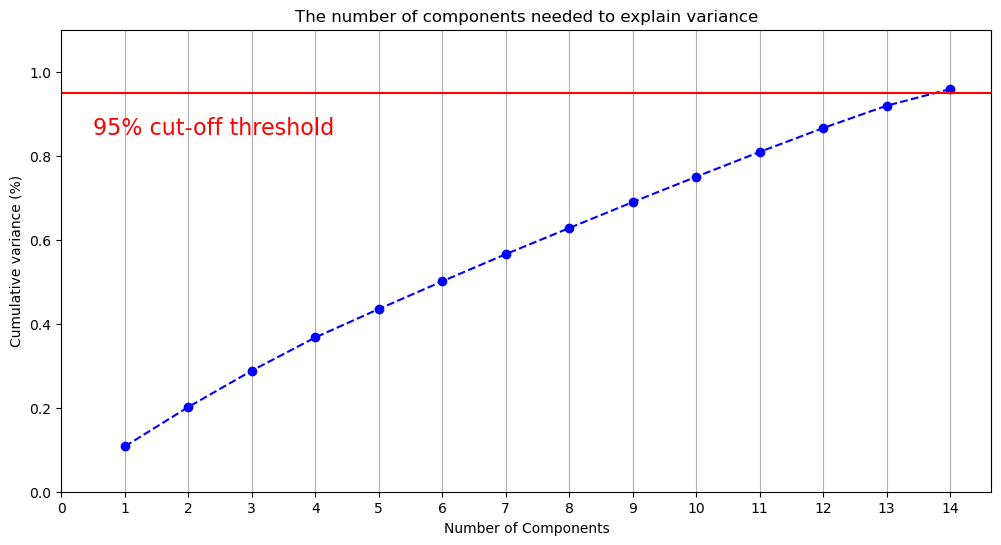

In [31]:
plt.rcParams["figure.figsize"] = (12,6)
fig, ax = plt.subplots()
xi = np.arange(1, 15, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 15, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

### logistic Regression model performance after PCA

In [32]:
from sklearn.model_selection import train_test_split
 
x_train_pca, x_test_pca, y_train, y_test = train_test_split(x_pca, y, test_size = 0.2, random_state = 0)

In [33]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train_pca, y_train)
model.score(x_test_pca, y_test)

0.9007871433256806

## so after droping last 2 columns we are lossing only 5% data and model performance has dropped by only 1%.

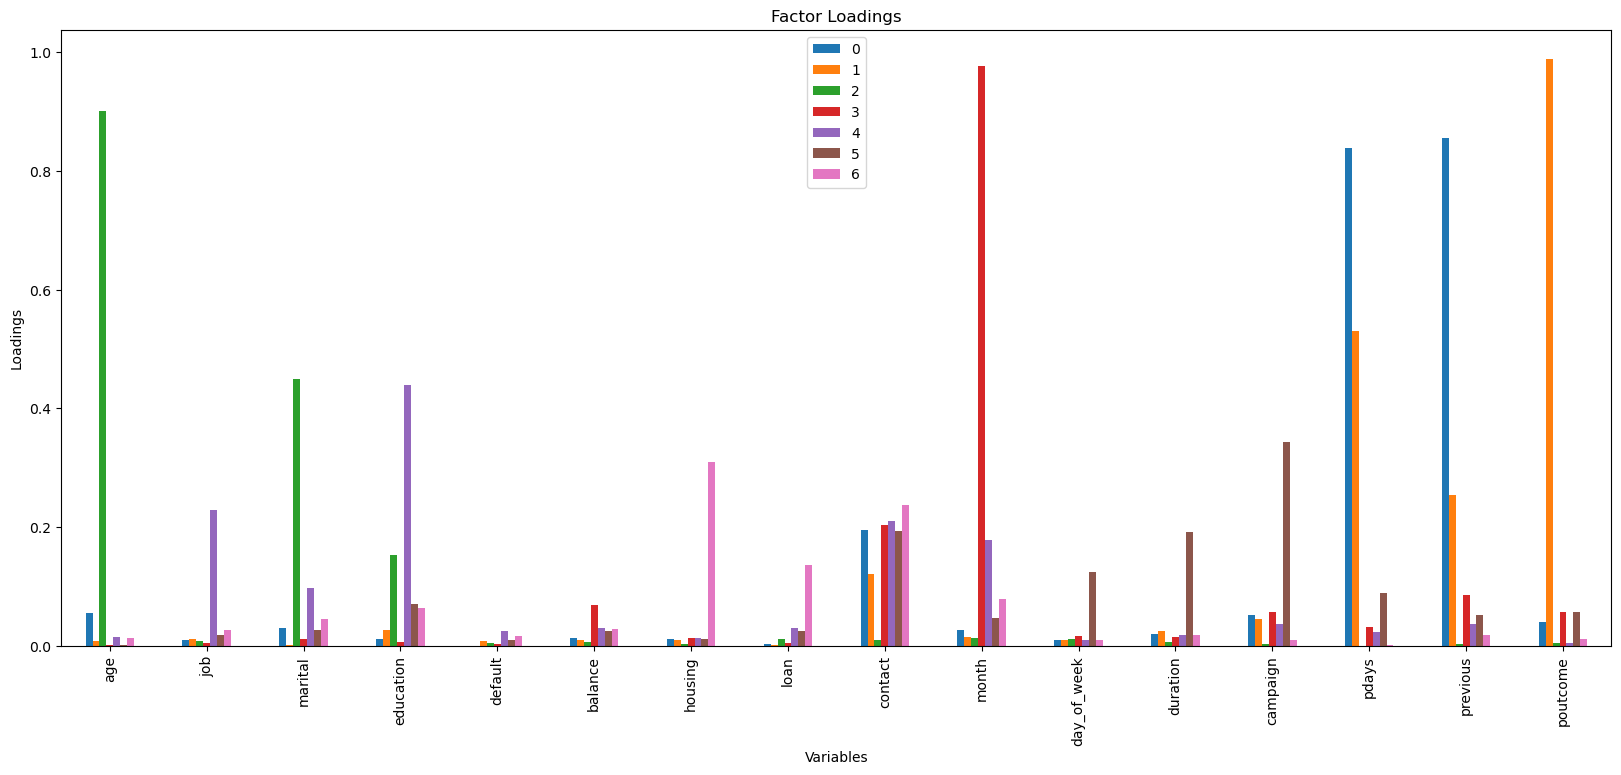

In [48]:
plt.figure(figsize=(20,8))
loadings = pd.DataFrame(fa.loadings_,index = x.columns)
loadings.abs().plot(kind = 'bar', ax = plt.gca())
plt.title('Factor Loadings')
plt.xlabel('Variables')
plt.ylabel('Loadings')
plt.show()